# Wine Chromatic Profile Prediction Project
### Group 22 

___
### INTRODUCTION
___

This project seeks to answer the following question:   
**"Can we predict the color of wine using its physiochemical properties, such as acidity, sugar content, and alcohol level?"** 

To answer this question, we are using a [data set](https://archive.ics.uci.edu/dataset/186/wine+quality) from the Vinho Verde region in Portugal . These datasets, publicly available through the UCI Machine Learning Repository, include 11 physiochemical attributes for each wine sample—such as fixed acidity, volatile acidity, pH, and alcohol content—along with a sensory-based quality score ranging from 0 to 10. The red wine dataset contains 1,599 samples, while the white wine dataset includes 4,898 samples, enabling a comprehensive analysis across different types of wine.

The ability to accurately classify wine color using machine learning could offer several advantages. For instance, winemakers and researchers could efficiently analyze large datasets, identify trends, and optimize production processes. Furthermore, consumers or wine retailers might use such tools to assess or verify wine characteristics without requiring advanced laboratory equipment. By developing a robust classification model, we aim to contribute to the wine industry’s growing adoption of data-driven methods, enhancing efficiency and accuracy in identifying and categorizing wines. Ultimately, this approach could lead to scalable, reproducible, and cost-effective methods for wine analysis.

___  
### METHODS
___

The code for this analysis and report is available on GitHub: <https://github.com/UBC-MDS/DSCI522-2425-22-wine-quality.git>.

The dataset was initially loaded into a single dataframe, and an exploratory data analysis was conducted to understand the distribution of features. This included checking for class imbalance in the target variable, examining collinearity between input features, and identifying the types of features present in the dataset. This analysis informed decisions regarding feature encoding in subsequent steps.

In [1]:
import pandas as pd 
import numpy as np 
import altair as alt
import altair_ally as aly
from ucimlrepo import fetch_ucirepo 

### Exploratory Data Analysis

To examine the data, we first looked at the data types of columns we will be working with: all features are numeric without any null values. Next, in order to select features for modelling, we examined each feature's distribution in respect to color and feaature correlations.

In [2]:
# loading data 
wine_quality = fetch_ucirepo(id=186) 
wine = pd.DataFrame(wine_quality.data.original) 
wine.to_csv("../data/wine.csv", index=False)
wine = pd.read_csv("../data/wine.csv")

In [3]:
print("Feature Datatypes\n")
print(wine.info())

Feature Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [4]:
print("Summary Statistics\n")
wine.describe()

Summary Statistics



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
aly.alt.data_transformers.enable('vegafusion')

print("Figure 1: Distribution of Features per Target Class")
aly.dist(wine, color = "color")

Figure 1: Distribution of Features per Target Class


alt.ConcatChart(...)

In [6]:
print("Figure 2: Correlation between Wine Color PRediction Features\n")
aly.corr(wine)

Figure 2: Correlation between Wine Color PRediction Features



alt.ConcatChart(...)

The class distributions for all predictors across all measurements show some overlap but display noticeable differences in their central tendencies and variability. The quality feature appears to have a tri-modal distribution and does not exhibit distinct differences based on the target class. However, it could still offer valuable predictive insights through interactions with other features. Therefore, we decided to build our predictive model with all the available features.

### Modelling

To understanding the relationship between a wine's physiochemical properties and its chromatic characteristics, we will use a Logistic Regression model, as it provides a probabilistic framework for classification with easu to interprete results. This approach enabled us to identify the most significant predictors of wine color while maintaining simplicity and interpretability in the modeling process. All variables from the original dataset were included in the model. The dataset was split into training and test sets, with 70% of the data allocated to training and 30% to testing. Prior to model fitting, all features were standardized, except for wine quality, which was encoded as an ordinal variable to preserve its inherent order.

The regularization hyperparameter `C` was optimized using 20-fold cross-validation with the F1 score as the evaluation metric. The `F1 score` was chosen to balance precision and recall, given that both false positives and false negatives have approximately equal negative impacts in this application. The optimal `C` value was determined to be `1.85` based on this process.

In [7]:
# imports for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    ConfusionMatrixDisplay, PrecisionRecallDisplay, 
    make_scorer, recall_score, precision_score, f1_score
)
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import (
    cross_validate,
    train_test_split,
    RandomizedSearchCV,
)
from scipy.stats import loguniform

In [8]:
train_df, test_df = train_test_split(wine, test_size=0.3, shuffle=True, random_state=123)
train_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
2457,6.7,0.22,0.39,10.2,0.038,60.0,149.0,0.99725,3.17,0.54,10.0,7,white
524,9.2,0.43,0.49,2.4,0.086,23.0,116.0,0.99760,3.23,0.64,9.5,5,red
4551,6.1,0.27,0.25,1.8,0.041,9.0,109.0,0.99290,3.08,0.54,9.0,5,white
5954,6.4,0.31,0.28,2.5,0.039,34.0,137.0,0.98946,3.22,0.38,12.7,6,white
3759,6.0,0.33,0.38,9.7,0.040,29.0,124.0,0.99540,3.47,0.48,11.0,6,white


In [9]:
X_train = train_df.drop(columns=["color"])
X_test = test_df.drop(columns=["color"])
y_train = train_df["color"]
y_test = test_df["color"]

In [10]:
# Transformations for different scales of the features
categorical_features = ["color"]
ordinal_features = ["quality"]
numerical_features = [col for col in wine.columns if col != "color" and col != "quality"]

preprocessor = make_column_transformer(
    (OrdinalEncoder(dtype=int), ordinal_features),
    (StandardScaler(), numerical_features),
    remainder='passthrough' 
)

In [11]:
pipe = make_pipeline(
    preprocessor, 
    LogisticRegression(random_state=123, max_iter=1000, class_weight="balanced"),
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['quality']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid',
                                                   'residual_sugar',
                                                   'chlorides',
                                                   'free_sulfur_dioxide',
                                                   'total_sulfur_dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=123))])

In [12]:
scoring = {
    "accuracy": 'accuracy',
    'precision': make_scorer(precision_score, pos_label = 'red'),
    'recall': make_scorer(recall_score, pos_label = 'red'),
    'f1': make_scorer(f1_score, pos_label = 'red')
}

# Running cross validation on default model
pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score = True, cv = 5, scoring = scoring)
).agg(['mean', 'std']).round(3).T

,mean,std
fit_time,0.013,0.002
score_time,0.020,0.002
test_accuracy,0.994,0.002
train_accuracy,0.994,0.001
test_precision,0.986,0.008
train_precision,0.987,0.003
test_recall,0.991,0.005
train_recall,0.990,0.001
test_f1,0.988,0.005
train_f1,0.989,0.001


In [13]:
# Hyperparameter optimization
param_grid = {
    "logisticregression__C": loguniform(1e-1, 10)
}

random_search = RandomizedSearchCV(
    pipe,
    param_grid,
    n_iter = 100,
    verbose = 1,
    n_jobs = -1,
    random_state = 123,
    return_train_score = True, 
    scoring = make_scorer(f1_score, pos_label = 'red')
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(dtype=<class 'int'>),
                                                                               ['quality']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'de...
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000,
                                                                 random_state=123))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1571378c0>},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=red),
                   verbose=1)

In [14]:
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score"
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,1,1,1,1,1,1,1,1,1,...,90,90,90,90,90,90,90,98,98,100
mean_train_score,0.988729,0.988729,0.988729,0.988729,0.988617,0.988617,0.988617,0.988617,0.988729,0.988729,...,0.986722,0.986278,0.986389,0.986833,0.986722,0.986278,0.986278,0.985835,0.985504,0.984944
mean_test_score,0.988756,0.988756,0.988756,0.988756,0.988756,0.988756,0.988756,0.988756,0.988756,0.988756,...,0.986087,0.986087,0.986087,0.986087,0.986087,0.986087,0.986087,0.985638,0.985638,0.985178
param_logisticregression__C,1.681857,1.827899,1.607386,1.667428,2.304632,1.856957,2.180859,2.235518,1.796793,1.777489,...,0.200565,0.155391,0.174284,0.207931,0.202368,0.146686,0.152830,0.131630,0.122231,0.107711
mean_fit_time,0.025725,0.027463,0.025249,0.026644,0.081685,0.027200,0.041398,0.033004,0.027364,0.033492,...,0.024985,0.033833,0.026379,0.026766,0.026488,0.026699,0.027052,0.027089,0.024832,0.027559


In [15]:
random_search.best_params_

{'logisticregression__C': np.float64(1.856957298624054)}


The analysis was performed using Python (Van Rossum and Drake, 2009) and the following libraries: requests (Reitz, 2011) for data retrieval, zipfile (Van Rossum and Drake, 2009) for handling compressed files, numpy (Harris et al., 2020) for numerical operations, pandas (McKinney, 2010) for data manipulation, altair (VanderPlas, 2018) for data visualization, and scikit-learn (Pedregosa et al., 2011) for model implementation and evaluation.

___
### RESULTS
___

Accuracy score on test data 0.9848024316109423


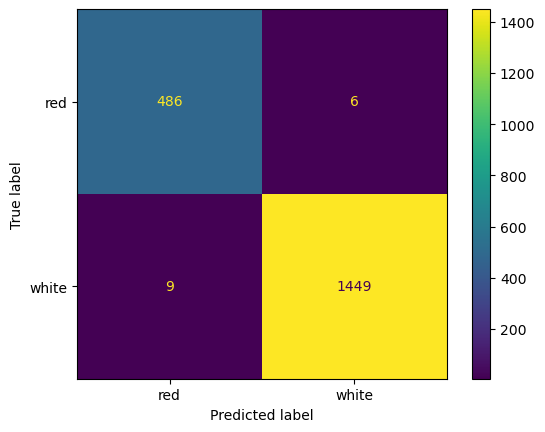

In [16]:
print("Accuracy score on test data", random_search.score(X_test, y_test))

# print confusion matrix
ConfusionMatrixDisplay.from_estimator(
    random_search,
    X_test,
    y_test,
    values_format="d"
);

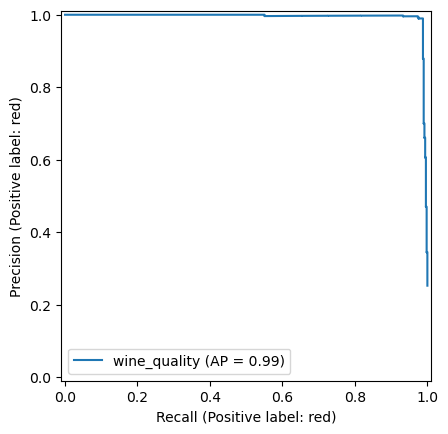

In [17]:
PrecisionRecallDisplay.from_estimator(
    random_search,
    X_test,
    y_test,
    pos_label="red",
    name='wine_quality', 
)

___
### DISCUSSION
___
From the results above, we see that the logistic regression with balanced class weight performs very well in the validation set as it scores more than 0.98 for all metrics, showing both a high performance in accuracy and much less classification bias due to very high recall and precision scores. Since the validation accuracy score is very high (>0.994), we decide to do a further randomized search cross-validation using the F1 score to find an optimized hyperparameter C that can minimize our classification bias.  

Using the optimized model on the test data, we see that the model has a high accuracy score as well (0.985). Moreover, from the confusion matrix, we see that there are very few false positives (false red) and false negatives (false white) compared to the true ones. This implies that the recall and precision scores are near 1 on the test data. This is further supported by the precision-recall curve as the average precision is 0.99 and the precision score maintains constantly very close to 1 when adjusting the threshold in the model.  

With the results being near perfect with the predictions on the test data, this is out of our expectations as we would expect there will be a more flawed prediction that will not perform as great in both recall and precision in general (especially not when both recall and precision are higher than 0.98). 

The near perfect scores in the test data suggest that our model will probably do a great job in predicting the wine type given any new data. However, we also have to bear in mind that the possibility that the model might not perform as well on actual unseen data. These very high scores are quite alarming that we might have to worry that it somehow overfits on both our train and test data and cannot generalize over new unseen data.  

___
### REFERENCES
___

Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

Dua, Dheeru, and Casey Graff. 2017. “UCI Machine Learning Repository.” University of California, Irvine, School of Information; Computer Sciences. http://archive.ics.uci.edu/ml.

Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362.

Jed Wing, Max Kuhn. Contributions from, Steve Weston, Andre Williams, Chris Keefer, Allan Engelhardt, Tony Cooper, Zachary Mayer, et al. 2019. Caret: Classification and Regression Training. https://CRAN.R-project.org/package=caret.

Reitz, Kenneth. 2011. Requests: HTTP for Humans. https://requests.readthedocs.io/en/master/.

VanderPlas, J. et al., 2018. Altair: Interactive statistical visualizations for python. Journal of open source software, 3(32), p.1057.

Van Rossum, Guido, and Fred L. Drake. 2009. Python 3 Reference Manual. Scotts Valley, CA: CreateSpace.